# <center> Credit Card Fraud Detection</center>

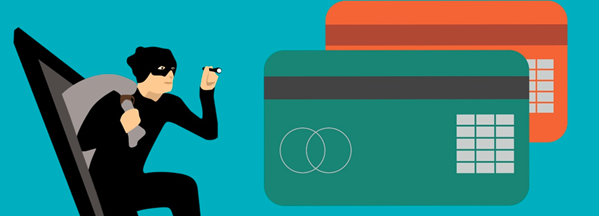

# Agenda

1. Business challenge

2. Data review

3. Data processing

<!-- DNN Model building
DNN Model evaluation
Decision Tree
Random forest
Sampling
Summary -->

### Business challenge

Detecting fraud transactions is of great importance for any credit card company. My task is to detect potential frauds so that customers are not charged for items that they did not purchase. The goal is to build a classifier that tells if a transaction is a fraud or not.

### Data review

The dataset is the Kaggle Credit Card Fraud Detection dataset [here](https://www.kaggle.com/datasets/yashpaloswal/fraud-detection-credit-card?datasetId=2467696).

In [123]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
import itertools
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

import sklearn
from sklearn import *

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<div style="background-color:#a2dce8">This dataset has no missig values, it only contains numerical variables. Principal components (V1-V28) obtained with PCA transformation. The only features which have not been transformed are ‘Time’ and ‘Amount’. ‘Time’ is the seconds elapsed between each transaction and the first. ‘Amount’ is the transaction amount. ‘Class’ is the response variable with 1 as fraud and 0 otherwise.</div>

In [5]:
df['class'].value_counts()

0    284315
1       492
Name: class, dtype: int64

 <div style="background-color:#a2dce8">The dataset contains 492 frauds out of 284,807 transactions. Thus, it is highly unbalanced</div>

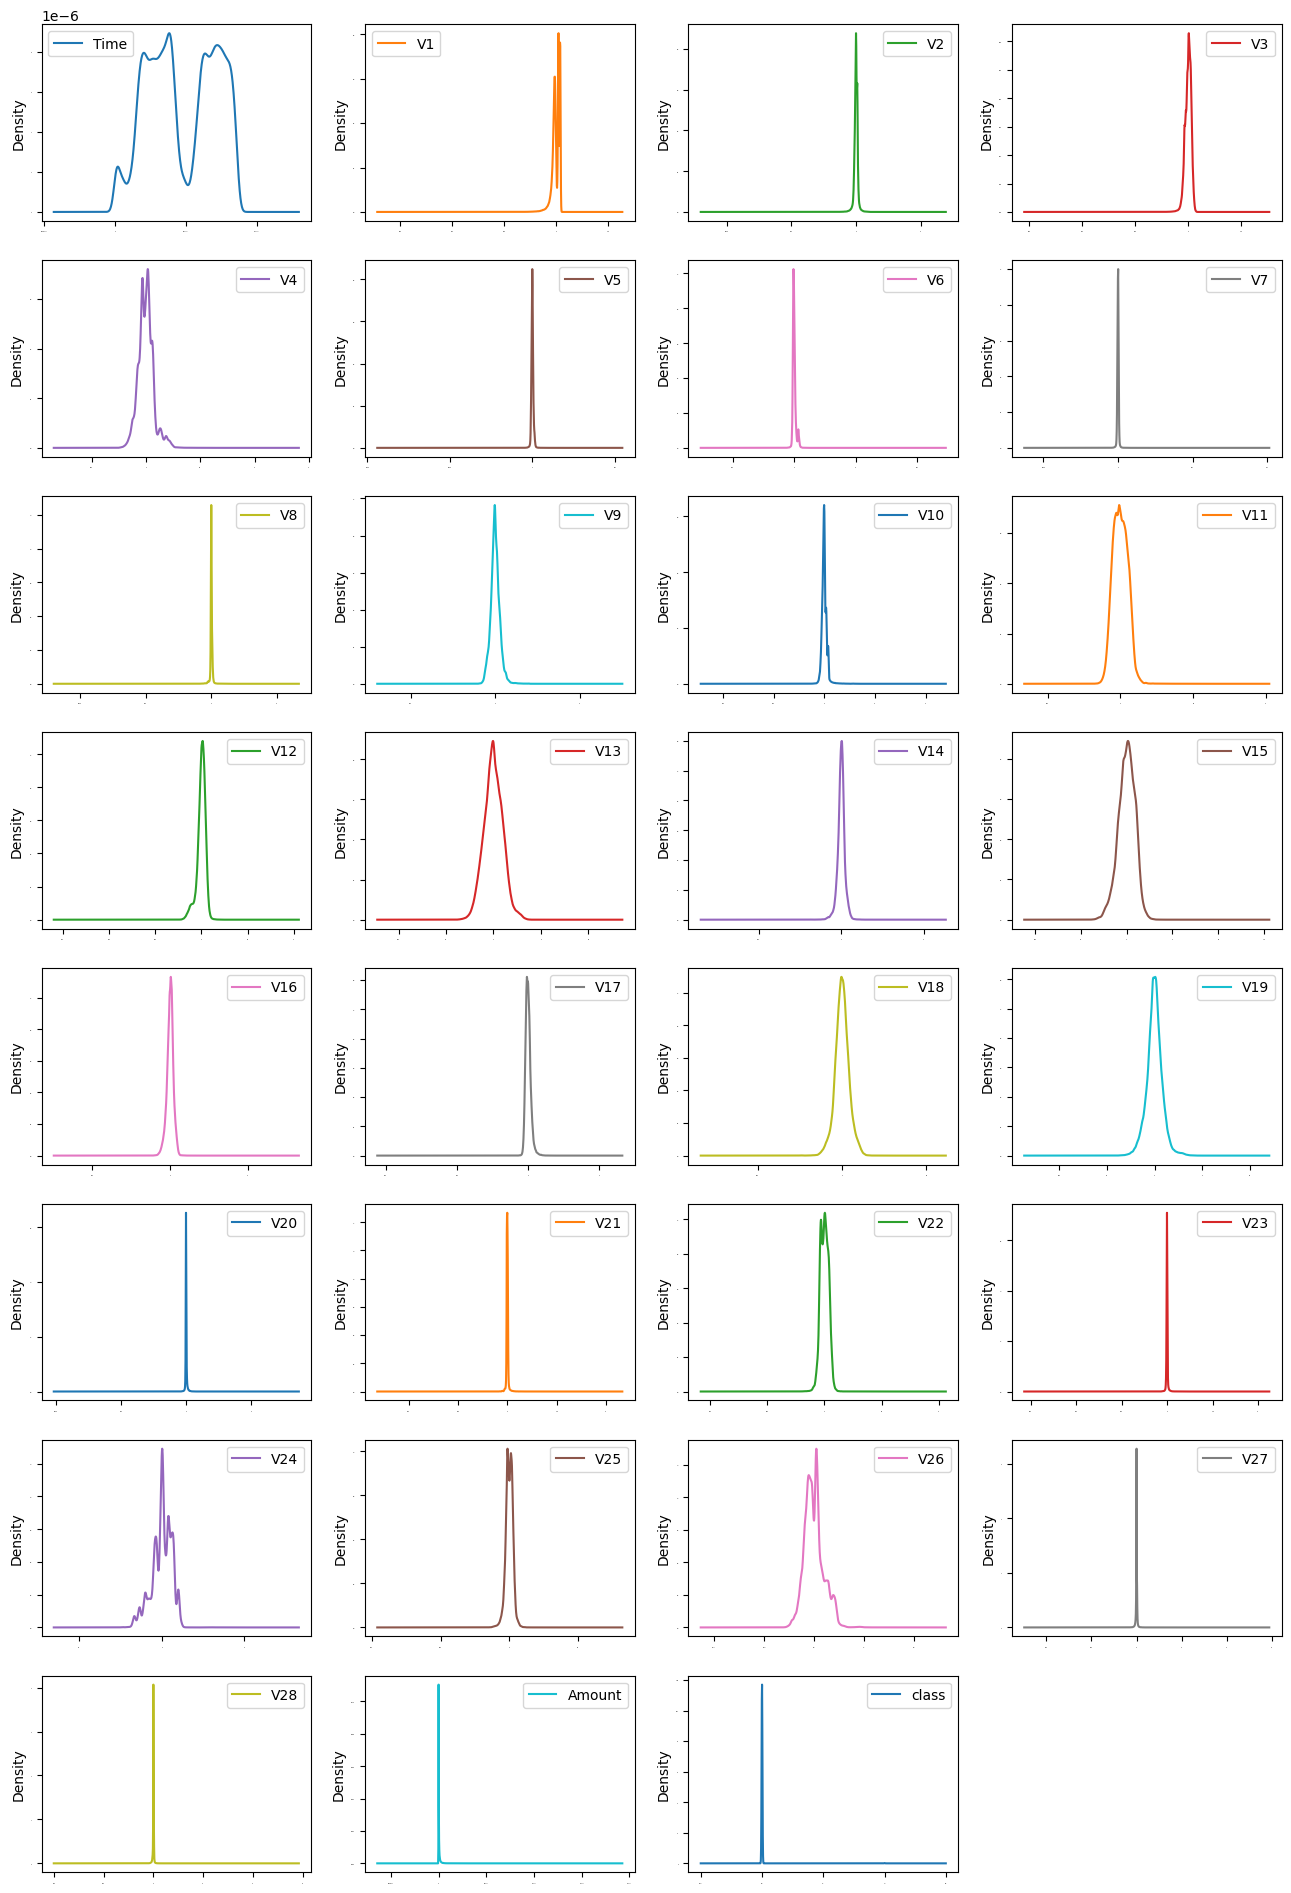

In [6]:
df.plot(
    kind='kde', 
    subplots=True, 
    layout=(8,4), 
    sharex=False, 
    legend=True,
    fontsize=1, 
    figsize=(16,24)
);

<div style="background-color:#a2dce8">Conclutions:
    
- class 0 = Non Fraudulent

- class 1 = Fraudulent

- V's 1 a 28 = confidential data that goes from negative numbers to positive numbers, PCA transformed
    
- Amount = Transaction value

- Time - Transaction time </div>

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The variable ‘Amount’ ranges from 0 to 25,691.16. Use Standardization so that more then 50% of the values lie in between (-1, 1)

### Data processing

In [8]:
scaler = StandardScaler()
df["NormAmount"] = scaler.fit_transform(df["Amount"].values.reshape(-1, 1))

In [9]:
df_del = df.drop(["Amount", "Time"], axis = 1)
y = df_del["class"]
X = df_del.drop(["class"], axis = 1)

In [115]:
X_train_full, X_test = train_test_split(X, test_size=0.2, random_state=11)
X_train, X_val = train_test_split(X_train_full, test_size=0.25, random_state=11)
y_train_full, y_test = train_test_split(y, test_size=0.2, random_state=11)
y_train, y_val = train_test_split(y_train_full, test_size=0.25, random_state=11)

In [116]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

In [118]:
print(decision_tree_model.score(X_test, y_test))
print(decision_tree_model.score(X_val, y_val))

0.9990695551420246
0.9990344440153085


In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [14]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))
print(roc_auc_score(y_train, y_pred))

0.9992626663389628
0.8043478260869565
0.7551020408163265
0.7789473684210526


In [ ]:
y_pred = rf_model.predict(X_val)
print(accuracy_score(y_val, y_pred.round()))
print(precision_score(y_val, y_pred.round()))
print(recall_score(y_val, y_pred.round()))
print(f1_score(y_val, y_pred.round()))
print(roc_auc_score(y_val, y_pred))

Confusion matrix, without normalization


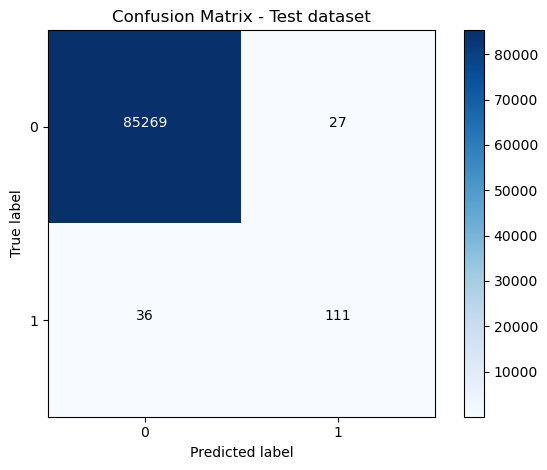

In [15]:
cm = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cm, classes = [0, 1], title = 'Confusion Matrix - Test dataset')

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred.round()))
print(precision_score(y_test, y_pred.round()))
print(recall_score(y_test, y_pred.round()))
print(f1_score(y_test, y_pred.round()))
print(roc_auc_score(y_train, y_pred))

In [ ]:
y_pred = rf_model.predict(X_val)
print(accuracy_score(y_val, y_pred.round()))
print(precision_score(y_val, y_pred.round()))
print(recall_score(y_val, y_pred.round()))
print(f1_score(y_val, y_pred.round()))
print(roc_auc_score(y_val, y_pred))

Confusion matrix, without normalization


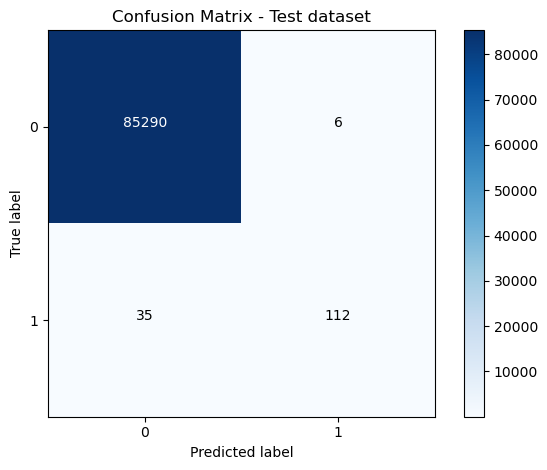

In [18]:
cm = confusion_matrix(y_test, y_pred.round())
plot_confusion_matrix(cm, classes = [0, 1], title = 'Confusion Matrix - Test dataset')